# 图像数据分析及挖掘

## 1. 项目描述：
FashionMNIST 是一个替代 MNIST 手写数字集的图像数据集。 它是由 Zalando（一家德国的时尚科技公司）旗下的研究部门提供。其涵盖了来自 10 种类别的共 7 万个不同商品的正面图片。FashionMNIST 的大小、格式和训练集 / 测试集划分与原始的 MNIST 完全一致。60000/10000 的训练测试数据划分，28x28 的灰度图片。

## 2. 数据集描述:
* Kaggle[提供的数据集](https://www.kaggle.com/zalando-research/fashionmnist)
* 数据字典
  * **label**: 类别标签，整型
  * **pixel1** -- **pixel784**: 784个像素值(784 = 28 * 28)
* 标签
  * **0**: T-shirt/top
  * **1**: Trouser
  * **2**: Pullover
  * **3**: Dress
  * **4**: Coat
  * **5**: Sandal
  * **6**: Shirt
  * **7**: Sneaker
  * **8**: Bag
  * **9**: Ankle boot

## 3. 项目任务：
* 3.1 数据查看
* 3.2 数据预处理
* 3.3 文本特征提取
* 3.4 建模及预测
* 3.5 由于数据量比较大，模型训练时间稍长，提供了一个简单和复杂的训练机制：
    * 1. 简单的默认参数的Logistic Regression；
    * 2. 复杂的包含交叉验证的多个模型

## 4. 项目实现：

In [1]:
# 引入必要的包
import os

In [2]:
# 指定数据集路径
dataset_path = './data'

# 训练集路径
train_data_file = os.path.join(dataset_path, 'fashion-mnist_train.csv')

# 测试集路径
test_data_file = os.path.join(dataset_path, 'fashion-mnist_test.csv')

# 构建标签字典
label_dict = {0: 'T-shirt/top',
              1: 'Trouser',
              2: 'Pullover',
              3: 'Dress',
              4: 'Coat',
              5: 'Sandal',
              6: 'Shirt',
              7: 'Sneaker',
              8: 'Bag',
              9: 'Ankle boot'}

In [3]:
# 图像大小
img_rows, img_cols = 28, 28

## 4.1 数据查看

In [4]:
import pandas as pd
import numpy as np

def load_fashion_mnist_dataset(data_file):
    """
        根据给定的fashion_mnist数据集文件读取数据

        参数：
            - data_file: 数据集路径
        返回：
            - X: 数据矩阵，[n_samples, img_rows * img_cols]
            - y: 标签
    """
    data_df = pd.read_csv(data_file)
    X = data_df.iloc[:, 1:].values.astype(np.uint8)
    y = data_df.iloc[:, 0].values.astype(np.uint8)
    
    # 添加类别描述
    data_df['label_desc'] = data_df['label'].map(label_dict)
    label_desc = data_df['label_desc'].copy()

    print('共有{}个图像'.format(X.shape[0]))

    return X, y, label_desc

In [5]:
# 加载训练数据
X_train, y_train, train_label_desc = load_fashion_mnist_dataset(train_data_file)

# 加载测试数据
X_test, y_test, test_label_desc = load_fashion_mnist_dataset(test_data_file)

共有60000个图像
共有10000个图像


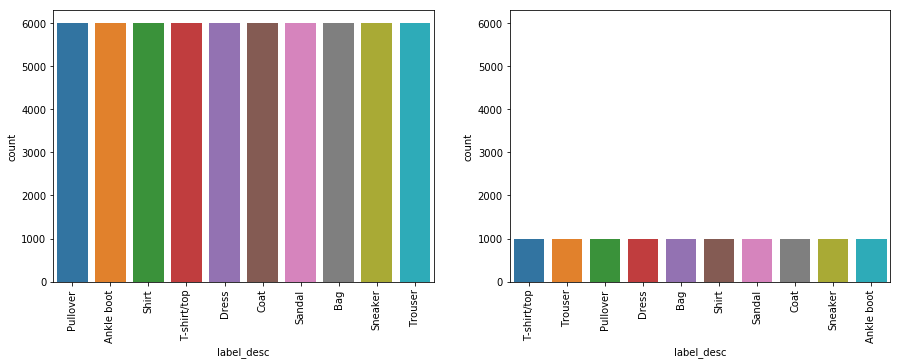

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 查看类别分布
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
sns.countplot(train_label_desc)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2, sharey=ax1)
sns.countplot(test_label_desc)
plt.xticks(rotation=90)
plt.show()

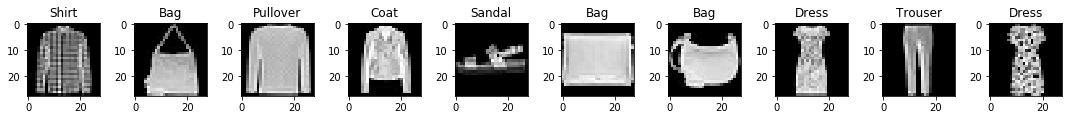

In [7]:
# 随机查看加载的图像数据
n_pics = 10

random_idx = np.random.choice(X_train.shape[0], n_pics, replace=False)

random_X = X_train[random_idx, :]
random_label = train_label_desc[random_idx]

plt.figure(figsize=(15, 10))
for i in range(n_pics):
    img_data = random_X[i, :].reshape(img_rows, img_cols)
    label = random_label.iloc[i]
    plt.subplot(1, n_pics, i + 1)
    plt.title(label)
    plt.imshow(img_data, cmap='gray')
    plt.tight_layout()
plt.show()

## 4.2 特征工程

In [8]:
import cv2

def extract_feats(X):
    """
        特征提取

        参数：
            - X: 数据矩阵，[n_samples, img_rows * img_cols]

        返回：
            -feat_arr: 特征矩阵
    """
    n_samples = X.shape[0]

    feat_list = []

    for i in range(n_samples):
        img_data = X[i, :].reshape(img_rows, img_cols)
        # 中值滤波，去除噪声
        blur_img_data = cv2.medianBlur(img_data, 3)

        # 直方图均衡化
        equ_blur_img_data = cv2.equalizeHist(blur_img_data)

        # cv2.imshow('original', img_data)
        # cv2.imshow('blurred', blur_img_data)
        # cv2.imshow('equalized', equ_blur_img_data)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

        # 将图像转换为特征向量
        feat = equ_blur_img_data.flatten()
        feat_list.append(feat)

        if (i + 1) % 5000 == 0:
            print('已完成{}个图像的特征提取。'.format(i + 1))

    feat_arr = np.array(feat_list)
    return feat_arr

In [9]:
# 训练数据特征提取
feats_train = extract_feats(X_train)

# 测试数据特征提取
feats_test = extract_feats(X_test)

已完成5000个图像的特征提取。
已完成10000个图像的特征提取。
已完成15000个图像的特征提取。
已完成20000个图像的特征提取。
已完成25000个图像的特征提取。
已完成30000个图像的特征提取。
已完成35000个图像的特征提取。
已完成40000个图像的特征提取。
已完成45000个图像的特征提取。
已完成50000个图像的特征提取。
已完成55000个图像的特征提取。
已完成60000个图像的特征提取。
已完成5000个图像的特征提取。
已完成10000个图像的特征提取。


In [38]:
from sklearn.preprocessing import StandardScaler

def do_feature_engineering(feats_train, feats_test):
    """
        特征处理

        参数：
            - feats_train: 训练数据特征矩阵
            - feats_test:  测试数据特征矩阵

        返回：
            - scaled_feats_train: 处理后的训练数据特征
            - scaled_feats_test: 处理后的测试数据特征
    """
    # 标准化
    std_scaler = StandardScaler()
    scaled_feats_train = std_scaler.fit_transform(feats_train.astype(np.float64))
    scaled_feats_test = std_scaler.transform(feats_test.astype(np.float64))

    return scaled_feats_train, scaled_feats_test, std_scaler

In [39]:
# 特征归一化处理
proc_feats_train, proc_feats_test, std_scaler = do_feature_engineering(feats_train, feats_test)

## 4.3 建模及预测

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

### 4.3.1 简单的逻辑回归模型

In [13]:
# 耗时比较短
# 模型训练
print('简单的Logistic Regression分类：')
lr = LogisticRegression()
lr.fit(proc_feats_train, y_train)

简单的Logistic Regression分类：


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
# 模型持久化
from sklearn.externals import joblib
joblib.dump(lr, 'trained_lr.pkl') 

['trained_lr.pkl']

In [15]:
# 模型测试
clf = joblib.load('trained_lr.pkl') 
print('测试准确率：{:.3f}'.format(clf.score(proc_feats_test, y_test)))

测试准确率：0.829


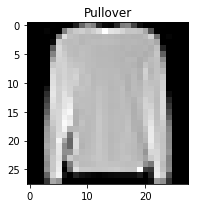

In [68]:
# 预测单一图像
random_test_idx = np.random.choice(X_test.shape[0], 1, replace=False)

single_test_X = X_test[random_test_idx, :]
test_label = test_label_desc[random_test_idx].values[0]

img_data = single_test_X.reshape(img_rows, img_cols)
plt.figure(figsize=(3, 3))
plt.title(test_label)
plt.imshow(img_data, cmap='gray')
plt.tight_layout()
plt.show()

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


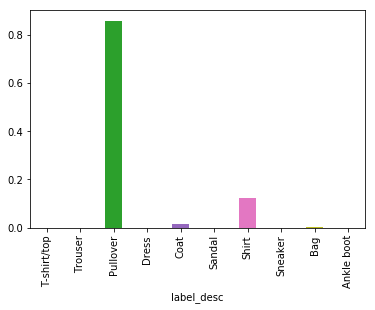

In [69]:
# 特征提取及处理
single_feat_test = extract_feats(single_test_X)
pro_single_feat_test = std_scaler.transform(single_feat_test)
pred_probs = clf.predict_proba(pro_single_feat_test)

# 构建结果dataframe
pred_df = pd.DataFrame(index=clf.classes_, data=pred_probs.reshape(-1, 1), columns=['pred_prob'])
pred_df['label_desc'] = pred_df.index.map(label_dict)
pred_df.plot(kind='bar', x='label_desc', y='pred_prob', legend=False)

### 4.3.2 多个机器学习模型

In [ ]:
import time
from sklearn.model_selection import GridSearchCV

def train_and_test_model(X_train, y_train, X_test, y_test, model_name, model, param_range):
    """

        根据给定的参数训练模型，并返回
        1. 最优模型
        2. 平均训练耗时
        3. 准确率
    """
    print('训练{}...'.format(model_name))
    clf = GridSearchCV(estimator=model,
                       param_grid=param_range,
                       cv=3,
                       scoring='accuracy',
                       refit=True)
    start = time.time()
    clf.fit(X_train, y_train)
    # 计时
    end = time.time()
    duration = end - start
    print('耗时{:.4f}s'.format(duration))

    # 验证模型
    print('训练准确率：{:.3f}'.format(clf.score(X_train, y_train)))

    score = clf.score(X_test, y_test)
    print('测试准确率：{:.3f}'.format(score))
    print('训练模型耗时: {:.4f}s'.format(duration))
    print()

    return clf, score, duration

In [ ]:
model_name_param_dict = {'kNN': (KNeighborsClassifier(),
                                     {'n_neighbors': [5, 25, 55]}),
                             'LR': (LogisticRegression(),
                                    {'C': [0.01, 1, 100]}),
                             'SVM': (SVC(kernel='linear'),
                                     {'C': [0.01, 1, 100]}),
                             'DT': (DecisionTreeClassifier(),
                                    {'max_depth': [50, 100, 150]}),
                             'AdaBoost': (AdaBoostClassifier(),
                                          {'n_estimators': [100, 150, 200]}),
                             'GBDT': (GradientBoostingClassifier(),
                                      {'learning_rate': [0.01, 1, 100]}),
                             'RF': (RandomForestClassifier(),
                                    {'n_estimators': [100, 150, 200]})}

# 比较结果的DataFrame
results_df = pd.DataFrame(columns=['Accuracy (%)', 'Time (s)'],
                          index=list(model_name_param_dict.keys()))
results_df.index.name = 'Model'

for model_name, (model, param_range) in model_name_param_dict.items():
    best_clf, best_acc, mean_duration = train_and_test_model(proc_feats_train, y_train, proc_feats_test,
                                                                   y_test, model_name, model, param_range)
    results_df.loc[model_name, 'Accuracy (%)'] = best_acc * 100
    results_df.loc[model_name, 'Time (s)'] = mean_duration

# 模型及结果比较
print('\n===================== 模型及结果比较 =====================')

plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
results_df.plot(y=['Accuracy (%)'], kind='bar', ylim=[50, 100], ax=ax1, title='Accuracy(%)', legend=False)

ax2 = plt.subplot(1, 2, 2)
results_df.plot(y=['Time (s)'], kind='bar', ax=ax2, title='Time (s)', legend=False)
plt.tight_layout()
plt.show()

## 5. 项目总结
* 该项目通过分析“时尚图片”数据集，并在该数据集上进行建模操作，包括:
    * 图像数据操作
    * 图像数据处理
    * 图像数据特征提取
    * 建模及预测
* 课后学员可模仿该项目的流程与操作，在现有数据集上通过改变模型的参数，观察对模型的性能有何影响
    * 尝试去掉对图像数据处理（中值滤波，直方图均衡化），然后比较模型的输出结果。